In [ ]:
# Bang Fikri Memasak Rendang
print("Hehe")

Hehe


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

In [ ]:
data = pd.read_excel("/content/Coffee Shop Sales.xlsx")

In [ ]:
# see top 5 rows
data.head(5)

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,hour,Total revenue
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday,7,6.0
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,7,6.2
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday,7,9.0
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday,7,2.0
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,7,6.2


In [ ]:
# see number of rows and columns
data.shape

(149116, 11)

In [ ]:
# see data duplicate
data.isna().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [ ]:
# see quick info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
# see unique values in each column

# 1- create new data frame with number of unique value in each column
columnValue = data.nunique().reset_index()

# 2- rename column name
columnValue.rename(columns = {"index" : "Column _name", 0 : "Uniue values"}, inplace = True)

# 3- see columns and number of unique values of each
columnValue

,Column _name,Uniue values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [ ]:
# See quick info of numeric data
data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [ ]:
# drop some columns such as "product_id", "transaction_id" and "store_id"
data.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

In [ ]:
# add new column year
data["year"] = data["transaction_date"].dt.year

# add new column month
data["month"] = data["transaction_date"].dt.month_name()

# add new column day
data["day"] = data["transaction_date"].dt.day_name()

In [ ]:
data.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday


In [ ]:
transactions_per_month = data['month'].value_counts()
iplot(px.bar(x=transactions_per_month.index, y=transactions_per_month.values,
             labels={'x': 'Month', 'y': 'Number of Transactions'},
             title='Transactions per Month', text_auto= True))

In [ ]:
transactions_per_day = data['day'].value_counts()
iplot(px.bar(x=transactions_per_day.index, y=transactions_per_day.values,
             labels={'x': 'Month', 'y': 'Number of Transactions'},
             title='Transactions per Day', text_auto= True))

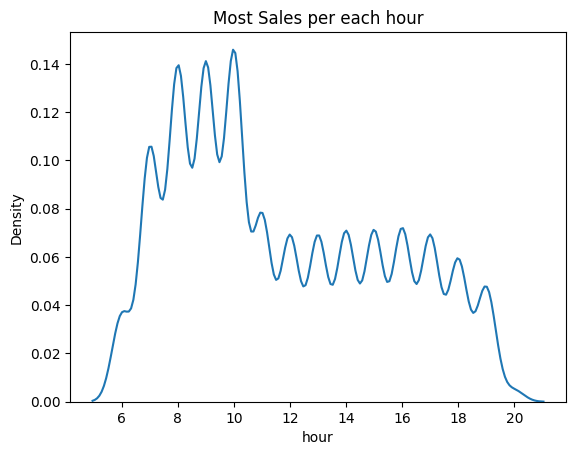

In [ ]:
data["hour"] = data["transaction_time"].apply(lambda x : x.hour)
# see distribution

sns.kdeplot(data["hour"])
plt.title('Most Sales per each hour')
plt.show()

In [ ]:
no_sales_quantity = data['transaction_qty'].value_counts()
iplot(px.bar(x=no_sales_quantity.index, y=no_sales_quantity.values,
             labels={'x': 'Quantity', 'y': 'Number of sales'},
             title='Number of sales quantity', text_auto= True))

In [ ]:
sales_per_store = data['store_location'].value_counts()
iplot(px.pie(names=sales_per_store.index, values=sales_per_store.values,
             title='Number of sales for each store'))

In [ ]:
category_count = data['product_category'].value_counts()
iplot(px.bar(x=category_count.index, y=category_count.values,
             labels={'x': 'Product Category', 'y': 'Count'},
             title='Category Count', text_auto= True))

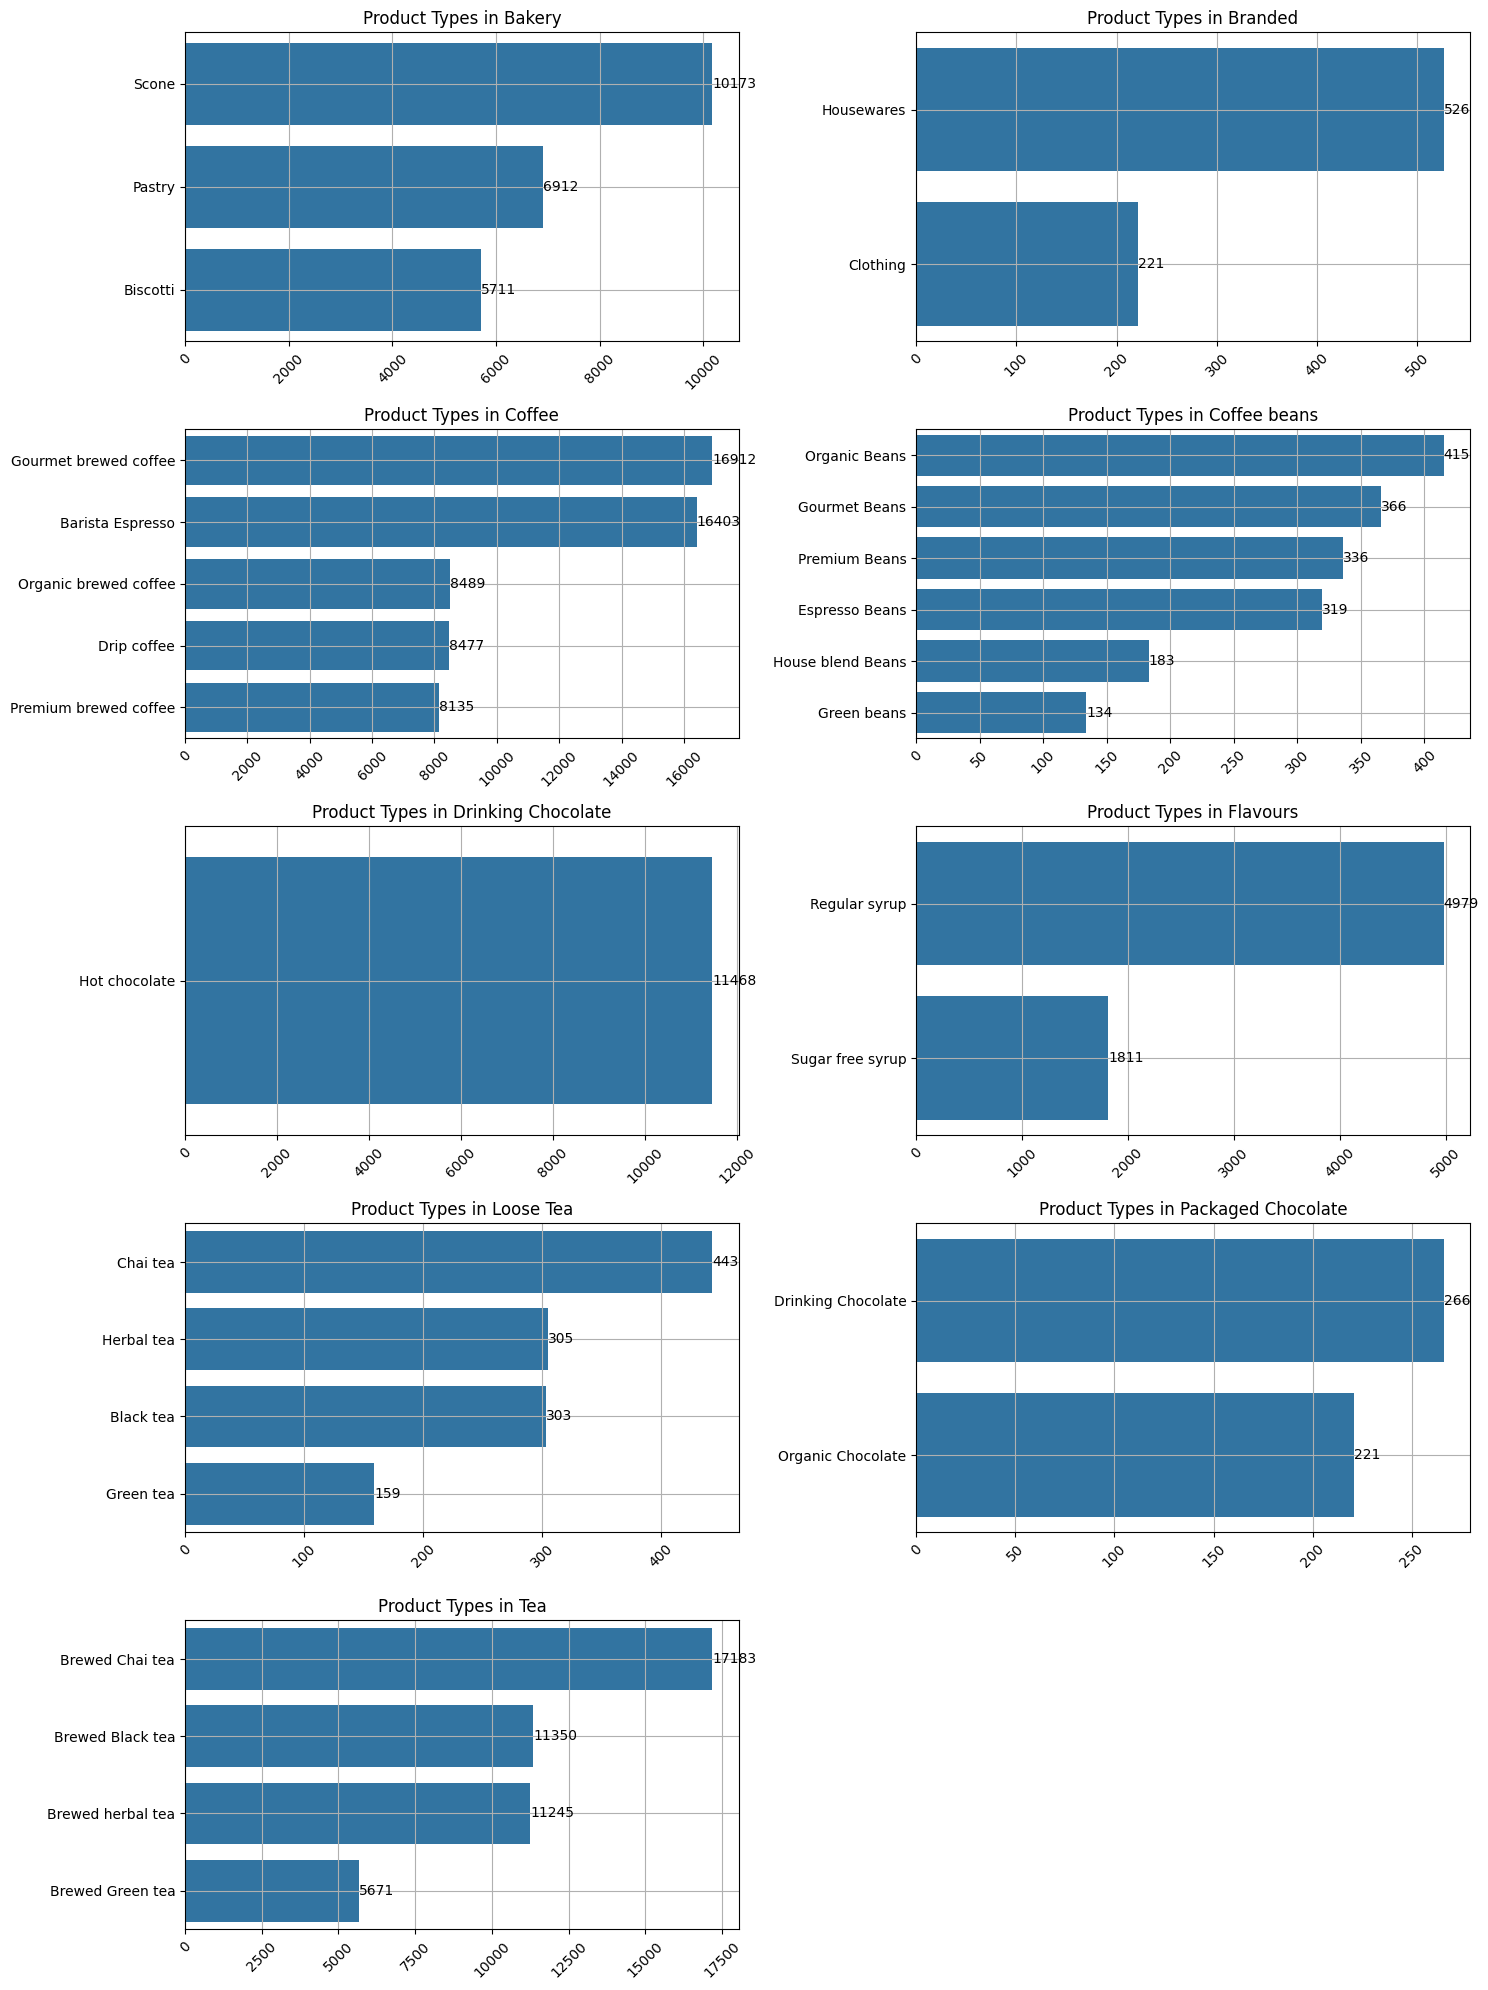

In [ ]:
# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = data.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 4x2 grid
fig, axes = plt.subplots(5, 2, figsize = (15, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]

    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)

    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)

    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

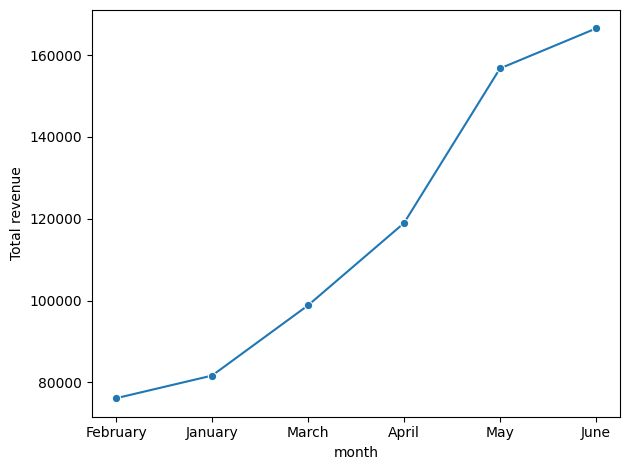

In [ ]:
# Month VS revenue
data["Total revenue"] = data["transaction_qty"] * data["unit_price"]

# Grouping by month and summing the revenue
monthly_revenue  = data.groupby("month")["Total revenue"].sum().reset_index().sort_values(by = "Total revenue")

# create line plot
sns.lineplot(x = "month", y = "Total revenue", data = monthly_revenue , marker = "o")

plt.tight_layout()
plt.show()

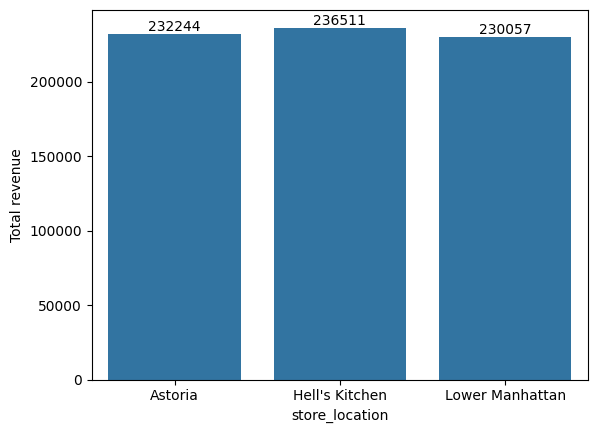

In [ ]:
# Calculate total revenue for each store_location
revenue = data.groupby("store_location")["Total revenue"].sum().reset_index()

# create bar plot
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

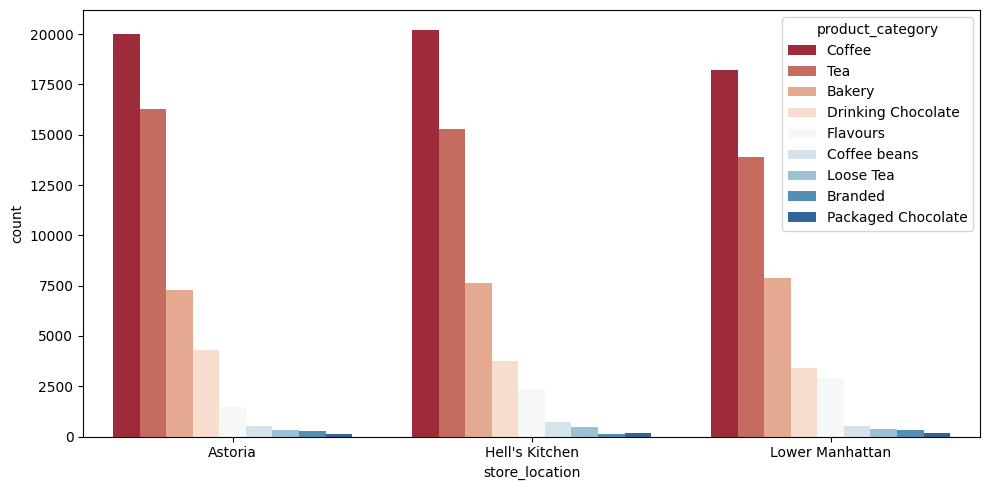

In [ ]:
# Stores VS product categories

# Calculate number of product categories at each store location
popular_products = data.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

In [ ]:
product_sales = data.groupby(['product_category', 'product_type'])['transaction_qty'].sum().reset_index()

fig = px.bar(product_sales, x='product_type', y='transaction_qty', color='product_category',
             labels={'transaction_qty': 'Total Quantity Sold', 'product_type': 'Product Type'},
             title='Total Quantity Sold for Each Product')

fig.show()